In [1]:
import numpy as np
from tensorflow import keras
from PIL import Image
import tensorflow as tf

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2022-09-26 19:45:07.298846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 19:45:07.398531: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 19:45:07.398744: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
input_dim = (96, 96, 3)
batch_size = 96
classes = 21
epochs = 50

In [4]:
# Create a simple CNN Model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same', input_shape=input_dim))
model.add(keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='same'))         
model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.Conv2D(256, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(21, activation='softmax'))

2022-09-26 19:45:16.776808: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-26 19:45:16.777349: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 19:45:16.777560: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-26 19:45:16.777721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so 

In [5]:
# Show architecture!
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       590080    
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 256)       590080    
                                                        

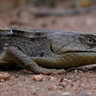

In [6]:
# Load the small dataset and shuffle order
with np.load('./train_small.npz') as f:
    X = f['X'] # Load input images
    y = f['y'] # Load Labels
    
    ind = np.arange(X.shape[0]) # Create Index
    np.random.shuffle(ind) # Shuffle Index
    X = X[ind,] # Shuffle X
    y = keras.utils.to_categorical(y[ind,]) # Shuffle X and create dummy variables
# Show first image
Image.fromarray(X[0], 'RGB')

In [7]:
# Compile the model
model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'])

In [ ]:
# Train
results = model.fit(x=X, y=y, 
              batch_size=batch_size, 
              epochs=epochs, 
              validation_split=0.2, 
              shuffle=True)

Epoch 1/50


2022-09-26 19:45:30.547492: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 209018880 exceeds 10% of free system memory.
2022-09-26 19:45:30.621787: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 209018880 exceeds 10% of free system memory.
2022-09-26 19:45:32.231806: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200
2022-09-26 19:45:35.061290: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.85GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-09-26 19:45:35.908868: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were availa

78/79 [============================>.] - ETA: 0s - loss: 3.5173 - categorical_accuracy: 0.0589

2022-09-26 19:46:08.104934: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.66GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2022-09-26 19:46:08.218750: W tensorflow/core/common_runtime/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


79/79 [==============================] - ETA: 0s - loss: 3.5119 - categorical_accuracy: 0.0591

2022-09-26 19:46:08.626411: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 52254720 exceeds 10% of free system memory.
2022-09-26 19:46:08.655118: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 52254720 exceeds 10% of free system memory.


79/79 [==============================] - 41s 426ms/step - loss: 3.5119 - categorical_accuracy: 0.0591 - val_loss: 2.9630 - val_categorical_accuracy: 0.0958
Epoch 2/50


2022-09-26 19:46:11.136314: W tensorflow/core/common_runtime/bfc_allocator.cc:360] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


79/79 [==============================] - 33s 414ms/step - loss: 2.8788 - categorical_accuracy: 0.1221 - val_loss: 2.7817 - val_categorical_accuracy: 0.1434
Epoch 3/50
79/79 [==============================] - 33s 417ms/step - loss: 2.7642 - categorical_accuracy: 0.1538 - val_loss: 2.6376 - val_categorical_accuracy: 0.1921
Epoch 4/50
79/79 [==============================] - 33s 417ms/step - loss: 2.6462 - categorical_accuracy: 0.1804 - val_loss: 2.5683 - val_categorical_accuracy: 0.1989
Epoch 5/50
79/79 [==============================] - 33s 417ms/step - loss: 2.5597 - categorical_accuracy: 0.2011 - val_loss: 2.4995 - val_categorical_accuracy: 0.2370
Epoch 6/50
79/79 [==============================] - 33s 417ms/step - loss: 2.4827 - categorical_accuracy: 0.2222 - val_loss: 2.4101 - val_categorical_accuracy: 0.2561
Epoch 7/50
79/79 [==============================] - 33s 417ms/step - loss: 2.4027 - categorical_accuracy: 0.2466 - val_loss: 2.3984 - val_categorical_accuracy: 0.2545
Epoch 8/5

In [ ]:
# Save model
model.save('./my_model')

In [ ]:
# Diese Zelle muss von mir ausgeführt werden können!
# Es müssen mindestens loss und categorical_accuracy angezeigt werden

model = keras.models.load_model('./my_model')
with np.load('./test.npz') as f:
    X_test = f['X']
    y_test = keras.utils.to_categorical(f['y'])
results = model.evaluate(X_test, y_test, batch_size=32)